# Machine Learning with Python

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 4.3 Clustering with time series.

Here we will explore some unsupervised learning using time series data.

The data are a variety of electronic signals and are labelled.

In [47]:
trace = pd.read_csv('trace.csv')
trace.head()

,label,0,1,2,3,4,5,6,7,8,...,265,266,267,268,269,270,271,272,273,274
0,1,0.54407,0.65786,0.61124,0.54541,0.53216,0.59301,0.59528,0.53828,0.56343,...,0.58823,0.57789,0.59807,0.58369,0.60288,0.55426,0.51415,0.60377,0.59633,0.58322
1,2,0.76643,0.62463,0.74225,0.66822,0.76612,0.73068,0.65511,0.72933,0.72365,...,0.68619,0.68500,0.65401,0.68998,0.64181,0.67280,0.61673,0.72218,0.66786,0.72445
2,4,-2.04500,-2.09170,-2.07760,-2.03350,-1.99020,-2.05770,-2.01280,-2.05100,-2.05530,...,0.55547,0.52443,0.48541,0.55053,0.59755,0.60643,0.52293,0.52429,0.54742,0.57056
3,3,-1.70500,-1.73910,-1.72570,-1.80170,-1.74250,-1.76040,-1.69160,-1.68750,-1.76150,...,0.64928,0.64069,0.62599,0.61621,0.61688,0.65652,0.59599,0.60164,0.65616,0.58226
4,1,0.54137,0.57191,0.56215,0.52095,0.52749,0.60404,0.54052,0.58038,0.50058,...,0.58600,0.62647,0.60962,0.55428,0.53947,0.53352,0.55775,0.50783,0.51377,0.52813


In [48]:
len(trace)

100

Ignoring the first column for now, plot all of these signals on the same time axis.

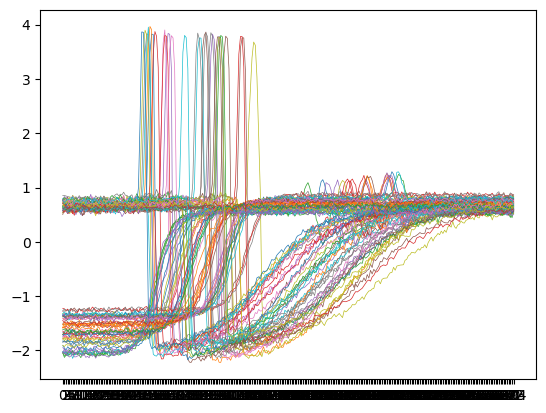

In [49]:
data = trace.iloc[:,1:]
plt.plot(data.T, linewidth=0.5)
plt.show()

Let's look in more detail. Can you make one subplot per label to separate the different signals?

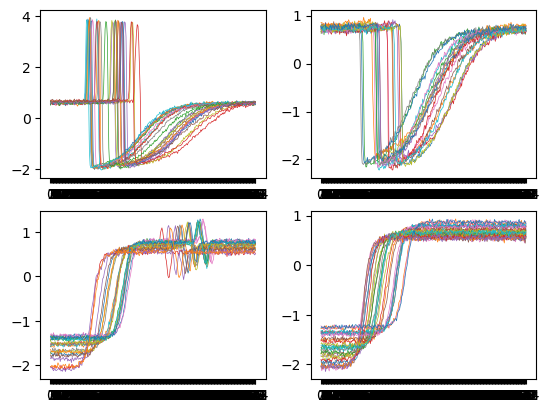

In [50]:
plt.figure()
for i in range(4):
    df = trace.query('label==@i + 1')
    plt.subplot(2, 2, i + 1)
    plt.plot(df.iloc[:,1:].T, linewidth=0.5)
plt.show()

This separation of signals would be the ideal result for clustering on this dataset.

Try with KMeans and evaluate your result.

In [51]:
from sklearn.cluster import KMeans
n_clusters = 4
km = KMeans(n_clusters=n_clusters, n_init='auto', random_state=0)

clusters = km.fit_predict(data)
clusters

array([1, 3, 0, 0, 1, 2, 2, 1, 3, 2, 0, 0, 0, 2, 0, 3, 2, 3, 0, 0, 2, 2,
       0, 1, 3, 3, 0, 2, 3, 2, 3, 1, 0, 2, 1, 3, 1, 3, 1, 1, 0, 2, 2, 0,
       0, 3, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 3, 2, 3, 0, 0, 2, 1,
       3, 3, 0, 0, 1, 2, 1, 1, 0, 2, 1, 3, 0, 2, 1, 2, 3, 2, 2, 2, 2, 3,
       3, 1, 0, 2, 0, 3, 0, 3, 3, 2, 3, 1], dtype=int32)

In [52]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(trace['label'], clusters)

0.3313967237493524

Visualise your clusters with one plot per cluster.

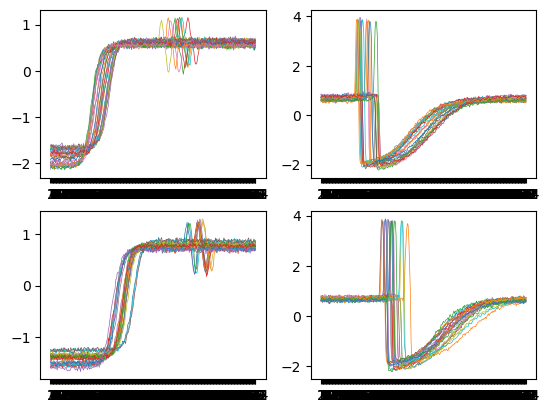

In [53]:
plt.figure()
for i in range(4):
    df = data[clusters == i]
    plt.subplot(2, 2, i + 1)
    plt.plot(df.iloc[:,1:].T, linewidth=0.5)
plt.show()

KMeans is a blunt instrument, but we may do better if we can use a distance-based clustering that is more flexible.

Experiment with agglomerative clustering to see if you can achieve a better result.

In [54]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=4, 
                              metric='euclidean', 
                              linkage='ward')
clusters2 = agg.fit_predict(data)


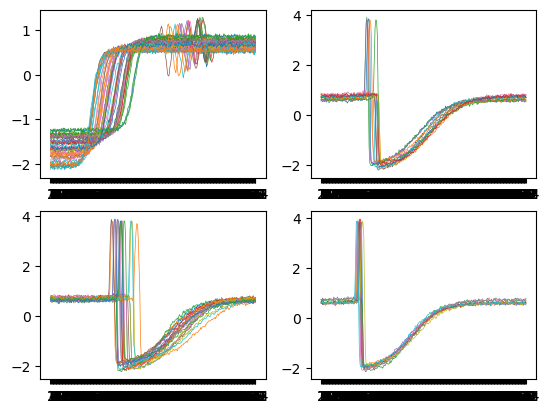

In [55]:
plt.figure()
for i in range(4):
    df = data[clusters2 == i]
    plt.subplot(2, 2, i + 1)
    plt.plot(df.iloc[:,1:].T, linewidth=0.5)
plt.show()

In [56]:
adjusted_rand_score(trace['label'], clusters2)

0.42807004097144014